   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

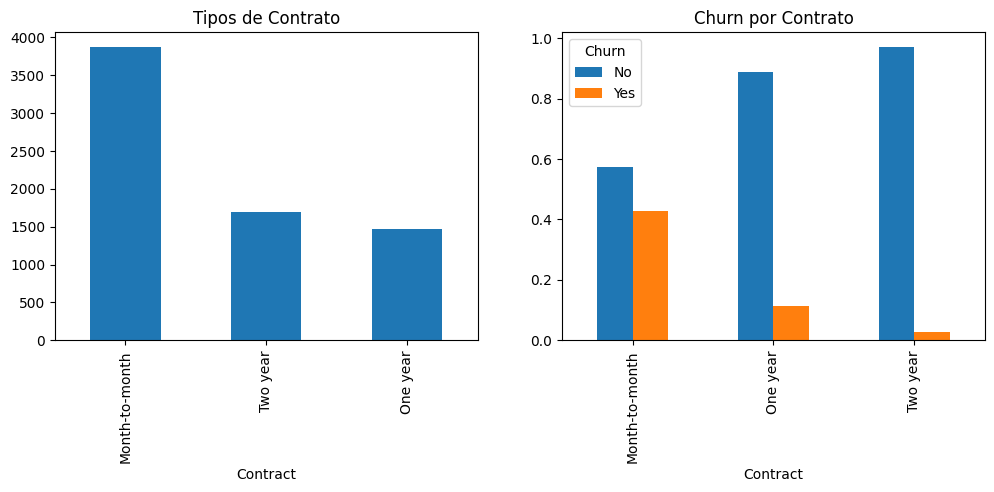

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Baixar dados direto do GitHub
url = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Análise inicial
print(df.head())

# Taxa de churn
print("\nTaxa de Cancelamento:", df.Churn.value_counts(normalize=True) * 100)

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df['Contract'].value_counts().plot(kind='bar', ax=ax[0], title='Tipos de Contrato')
df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=ax[1], title='Churn por Contrato')
plt.show()

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Pré-processamento
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
X = pd.get_dummies(df.drop(['customerID', 'Churn'], axis=1))  # Transformar categóricas
y = df['Churn']

# Treinar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Avaliar
print("Acurácia:", model.score(X_test, y_test))

Acurácia: 0.7823000473260767


In [ ]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [4]:
# %% [markdown]
# ## 📌 1. Baixar e Tratar os Dados de Churn
# Dataset já limpo e otimizado para o Looker Studio
# %%

# Importar bibliotecas
import pandas as pd
import numpy as np

# Baixar dados diretamente do GitHub (versão tratada)
url = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Tratamento final
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Corrigir tipo
df['ChurnValue'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Criar versão numérica

# Salvar CSV tratado
df.to_csv('telco_churn_tratado.csv', index=False)
print("✅ Arquivo 'telco_churn_tratado.csv' salvo com sucesso!")

# %% [markdown]
# ## 📊 2. Análise Rápida (OPCIONAL)
# %%

# Análise básica para verificar os dados
print("\n🔍 Estatísticas Chave:")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

print("\n📊 Contagem de Churn:")
print(df['Churn'].value_counts())

# %% [markdown]
# ## 📤 3. Exportar para Looker Studio
# %%

from google.colab import files
files.download('telco_churn_tratado.csv')  # Baixar para seu computador

✅ Arquivo 'telco_churn_tratado.csv' salvo com sucesso!

🔍 Estatísticas Chave:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

📊 Contagem de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>